In [1]:
import os
import sys
proj_dir = os.path.split(os.getcwd())[0]
if proj_dir not in sys.path:
    sys.path.append(proj_dir)

In [2]:
# Import libs
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Загрузка данных

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

## Метки классов

|Метка|Класс|
|:-----:|:-----|
|0|T-shirt (Футболка)|
|1|Trouser (Брюки)|
|2|Pullover (Свитер)|
|3|Dress (Платье)|
|4|Coat (Пальто)|
|5|Sandal (Сандали)|
|6|Shirt (Рубашка)|
|7|Sneaker (Кроссовки)|
|8|Bag (Сумка)|
|9|Ankle boot (Ботильоны)|

## Подготовка данных

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_imgs.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_imgs.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

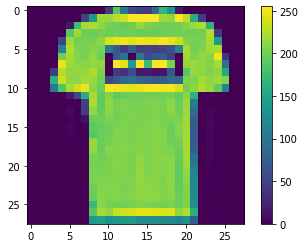

In [10]:
plt.imshow(train_imgs[1])
plt.colorbar()
plt.show()

In [11]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

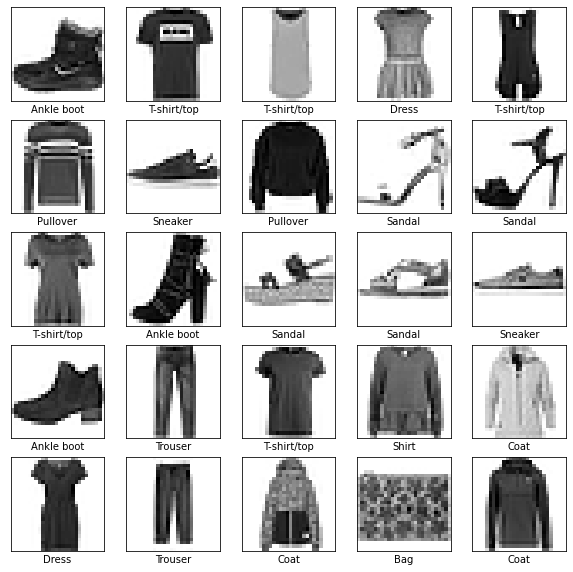

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap='binary')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# модели

In [15]:
import src.models.model_arch as arch

In [22]:
import importlib
importlib.reload(arch)

<module 'src.models.model_arch' from '/Users/laptevartem/Repositories/fashionMNIST_experiments/src/models/model_arch.py'>

In [17]:
dense_model = arch.dense_model()
dense_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
dense_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_dense = dense_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                    train_labels,
                    epochs=20, validation_split=0.18, batch_size=256)

Epoch 1/20
193/193 [==============================] - 2s 7ms/step - loss: 0.8944 - accuracy: 0.6980 - val_loss: 0.5005 - val_accuracy: 0.8225
Epoch 2/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.8401 - val_loss: 0.4339 - val_accuracy: 0.8488
Epoch 3/20
193/193 [==============================] - 1s 4ms/step - loss: 0.4042 - accuracy: 0.8598 - val_loss: 0.4236 - val_accuracy: 0.8535
Epoch 4/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3836 - accuracy: 0.8665 - val_loss: 0.4251 - val_accuracy: 0.8457
Epoch 5/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3690 - accuracy: 0.8690 - val_loss: 0.3886 - val_accuracy: 0.8631
Epoch 6/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.8776 - val_loss: 0.3622 - val_accuracy: 0.8711
Epoch 7/20
193/193 [==============================] - 1s 4ms/step - loss: 0.3294 - accuracy: 0.8823 - val_loss: 0.3672 - val_accuracy: 0.8704
Epoch 

In [18]:
dense_model.save("../models/dense_arch_model.h5")
#dense_model = keras.models.load_model("../models/dense_arch_model.h5")

In [19]:
conv_model = arch.conv_model()
conv_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)        

In [21]:
history_conv = conv_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                    train_labels,
                    epochs=20, validation_split=0.18, batch_size=256)

Epoch 1/20
193/193 [==============================] - 33s 167ms/step - loss: 1.2169 - accuracy: 0.5571 - val_loss: 0.4796 - val_accuracy: 0.8286
Epoch 2/20
193/193 [==============================] - 30s 154ms/step - loss: 0.5233 - accuracy: 0.8055 - val_loss: 0.3876 - val_accuracy: 0.8598
Epoch 3/20
193/193 [==============================] - 30s 153ms/step - loss: 0.4429 - accuracy: 0.8364 - val_loss: 0.3456 - val_accuracy: 0.8715
Epoch 4/20
193/193 [==============================] - 30s 153ms/step - loss: 0.3843 - accuracy: 0.8586 - val_loss: 0.3214 - val_accuracy: 0.8818
Epoch 5/20
193/193 [==============================] - 29s 152ms/step - loss: 0.3643 - accuracy: 0.8656 - val_loss: 0.3015 - val_accuracy: 0.8886
Epoch 6/20
193/193 [==============================] - 30s 153ms/step - loss: 0.3377 - accuracy: 0.8749 - val_loss: 0.2907 - val_accuracy: 0.8916
Epoch 7/20
193/193 [==============================] - 30s 153ms/step - loss: 0.3231 - accuracy: 0.8813 - val_loss: 0.2782 - val_ac

In [22]:
conv_model.save("../models/conv_arch_model.h5")
#conv_model = keras.models.load_model("../models/conv_arch_model.h5")

In [23]:
sep_model = arch.separableconv_model()
sep_model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
sep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 26, 26, 32)        73        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 11, 11, 64)        2400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 3, 3, 128)         8

In [30]:
history_sep = sep_model.fit(train_imgs.reshape(60000, 28, 28, 1),
                    train_labels,
                    epochs=20, validation_split=0.18, batch_size=256)

Epoch 1/20
193/193 [==============================] - 34s 175ms/step - loss: 0.4046 - accuracy: 0.8488 - val_loss: 0.3596 - val_accuracy: 0.8646
Epoch 2/20
193/193 [==============================] - 32s 164ms/step - loss: 0.3988 - accuracy: 0.8507 - val_loss: 0.3524 - val_accuracy: 0.8656
Epoch 3/20
193/193 [==============================] - 31s 160ms/step - loss: 0.3921 - accuracy: 0.8533 - val_loss: 0.3463 - val_accuracy: 0.8729
Epoch 4/20
193/193 [==============================] - 32s 165ms/step - loss: 0.3878 - accuracy: 0.8559 - val_loss: 0.3473 - val_accuracy: 0.8712
Epoch 5/20
193/193 [==============================] - 34s 178ms/step - loss: 0.3875 - accuracy: 0.8556 - val_loss: 0.3361 - val_accuracy: 0.8756
Epoch 6/20
193/193 [==============================] - 34s 178ms/step - loss: 0.3841 - accuracy: 0.8562 - val_loss: 0.3386 - val_accuracy: 0.8767
Epoch 7/20
193/193 [==============================] - 29s 152ms/step - loss: 0.3793 - accuracy: 0.8594 - val_loss: 0.3294 - val_ac

In [26]:
import src.visualization.visualize as vis

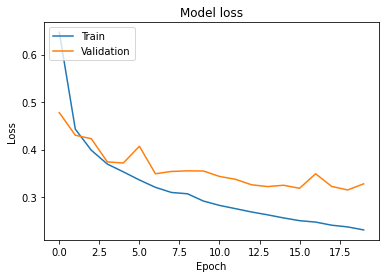

In [23]:
vis.plot_loss_graph(history_dense)

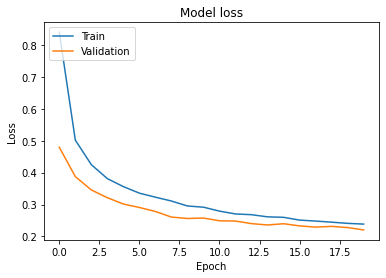

In [24]:
vis.plot_loss_graph(history_conv)

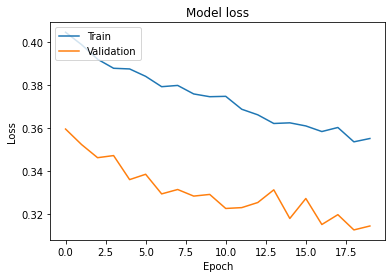

In [31]:
vis.plot_loss_graph(history_sep)

In [25]:
test_loss, test_acc = dense_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3449 - accuracy: 0.8793
Test accuracy: 0.8792999982833862


In [26]:
test_loss, test_acc = conv_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.2348 - accuracy: 0.9113
Test accuracy: 0.911300003528595


In [32]:
test_loss, test_acc = sep_model.evaluate(test_imgs.reshape(10000, 28, 28, 1), test_labels)
print('Test accuracy:', test_acc)
#print('Test loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.3260 - accuracy: 0.8809
Test accuracy: 0.8809000253677368


# Let's look ar predictions

In [41]:
predictions = model.predict(test_imgs.reshape(10000, 28, 28, 1))

In [42]:
predictions[0]

array([6.9732300e-07, 6.1908381e-09, 1.0515065e-06, 6.6235359e-08,
       5.1159901e-07, 1.5725325e-03, 1.7323255e-06, 1.8438907e-02,
       2.1110789e-05, 9.7996336e-01], dtype=float32)

In [43]:
np.argmax(predictions[0])

9

In [44]:
test_labels[0]

9

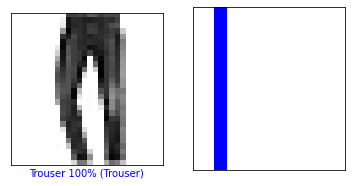

In [46]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
vis.plot_image(predictions[i], test_labels[i], test_imgs[i], class_names)
plt.subplot(1,2,2)
vis.plot_value_array(predictions[i],  test_labels[i])
plt.show()

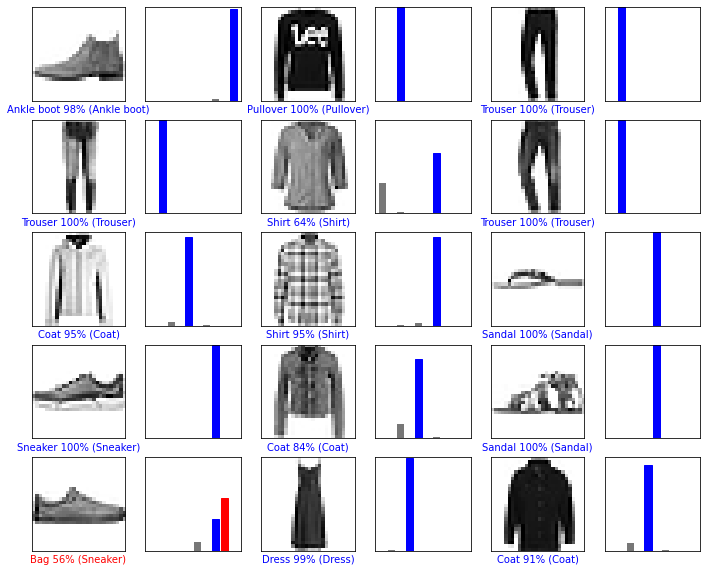

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    vis.plot_image(predictions[i], test_labels[i], test_imgs[i], class_names)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    vis.plot_value_array(predictions[i], test_labels[i])
plt.show()

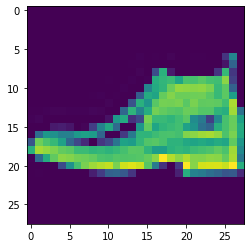

In [48]:
img = test_imgs[4567]
plt.imshow(img)
plt.show()

Модели tf.keras оптимизированы для того, чтобы делать прогнозы на пакеты (batch) или коллекции (collection). Поэтому, хотя мы используем одно изображение, нам нужно добавить его в список:

In [49]:
print(img.shape)
img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [50]:
single_prediction = model.predict(img.reshape(1, 28, 28, 1))
single_prediction

array([[6.48145565e-11, 1.19262803e-12, 8.37025893e-10, 8.43606088e-12,
        2.40756498e-10, 4.74842227e-06, 6.84535428e-10, 1.18876305e-04,
        1.40397094e-06, 9.99874949e-01]], dtype=float32)

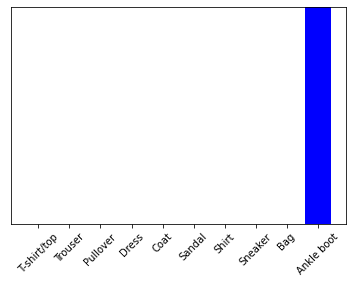

In [51]:
vis.plot_value_array(single_prediction.flatten(), test_labels[4567])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [20]:
model = keras.applications.Xception()

91889664/91884032 [==============================] - 32s 0us/step


In [21]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________